Exceptions
==========

Things sometimes don't go as planned – especially when you're dealing with user input, content captured "from the wild", or integrating code written by others into your own. In these situations you need a way to gracefully handle surprises without crashing your code.

Sometimes things do go as expected and you want to set up "sentinels" to identify specific, anticipated situations and act accordingly.

You'll find Python's built-in exceptions model to be useful in both of these situations. This chapter will explore how you can put it to use.

Basic Usage
-----------

The easiest form of an exception is the **assert** statement. Its syntax is pretty easy:

assert \<some statement\>

In [ ]:
assert True

In [ ]:
assert False

As you can see, the interpreter generates an **AssertionError** (which is a type of exception) when statement evaluated is **False**. This sort of a blunt approach that doesn't yield much actionable information, but it is a "quick and dirty" way to identify a problem during execution.

As this stands, finding a **False** condition basically crashes your program – something you usually don't want to happen. So how can you handle this more smoothly? You can tell the interpreter what to do in specific circumstances using a **try** / **except** block. 

Here's how:

In [ ]:
try:
    assert False
except AssertionError:
    print("Sorry, pal")
    print("I'm gonna keep running.")

Much better, right? The general form of a try/except block is:

    try:
        <an indented suite of statements>

    except <some exception>:
        <an indented suite of statements >

    except <some exception>:
        <an indented suite of statements >

    finally:
        <an indented suite of statements>

You can "stack" exceptions handled much like **elif** statements in an **if**..**then**..**else** block. Exception handling stops at the first one found. The **finally** block gets executed no matter what.

Here's an example:

In [ ]:
def bad_int():
    int('a')

def bad_not_defined():
    int(a)

def bad_div():
    1/0

def good():
    print("Hi!")

for func in (bad_int, bad_not_defined, bad_div, good):
    try:
        func()
    except ValueError:
        print("you have no values.")
    except TypeError:
        print("Learn how to type.")
    except NameError:
        print("You have a horse with no name.")
    except ZeroDivisionError:
        pass
    finally:
        print("I'm done.\n")

One important point to note here is that, like an **if .. elif ..elif** stack of code only one exception handler's indented suite can be executed. The implication is that you want to catch the most general exceptions at the top of the stack and the most general ones at the bottom. More on this in a moment, but it's an important design consideration.

The Exception Class
-------------------

In Python, exceptions are all derived from the same parent (called **Exception**) and specified to handle individual problems[54]. This presents the possibility to create your own if none of the built-in ones fit. 

Here's how you might create simple custom exception and a more elaborate one to handle the potentially-serious Wombat condition:

In [ ]:
# A minimal custom exception
class MinimalException(Exception):
    pass

class WombatException(Exception):
    def __str__(self):
        return("Wombat!")

def wombat():
    raise WombatException
    
wombat()
#result
#__main__.WombatException: Wombat!

Here, we see what's known as a "Traceback".   This shows the chain of execution present at the time the problem was encountered.   The proximate (latest) cause is at the bottom.   The exception event was triggered earlier by the call to wombat().   Careful inspection of this reveals the call stack (layering of what calls what) and local context of the trigger(s).

We'll get into classes later in the course. For now, know that we took a **class** object already part of the language, inherited from, and redefined part of it.

Because all exceptions are inherited from the same parent, there's a complex "family tree" of available ones. Here's part of it:

    +-- BaseException
    +-- Exception
    +-- StopIteration
    +-- StopAsyncIteration
    +-- ArithmeticError
        | +-- FloatingPointError
        | +-- OverflowError
        | +-- ZeroDivisionError

You don't need an encyclopedic understanding of all this but it's important to know that the interpreter will catch exceptions closest to the "root" of the family tree. To put it another way, if you have a line of code like this:

    except ArithmeticError:
    
Python will catch the **FloatingPointError**, **OverFlowError**, and **ZeroDivisionError**. 

If you do this:

    except Exception:   
    
Python will catch any exception.  


Python has many built-in exception types that handle specific problems encountered during execution. Some of the more common ones include:

    -   **KeyboardInterrupt** (the user hits cntl-c)

    -   **TypeError** (the wrong type of object was provided)

    -   **ValueError** (an invalid argument was supplied)  
    
The entire "family tree" of exceptions is in the official docs[55] and could make a valuable addition to your personal library.    

Miscellaneous
-------------

If you want to capture the message that normally comes with the exception in your own **except** clause, you can create a handle to it and print it out. You can also print out the call stack and specific lines of code that caused the problem (what you normally get when you make a mistake at the keyboard) using **traceback**.

Also, you can ask the interpreter to pass handling of the exception to a handler higher up in the call stack (one of the routines that called your current routine) with the keyword **raise**. If that error was handled higher up, it will be handled there. 

Here, we set up a handler in the for block – a fancier one this time because we have named our error handler "ve" and printed it out. We also have chosen one of the methods of the **traceback** module to give detailed information about the source of the problem[56].

Note that the function **another\_bad\_int** does not have any of the handling logic. If a problem is detected there, it "passes the buck" to the handler we just set up[57].

Here's an example:

In [ ]:
import traceback
def another_bad_int():
    try:
        int('b')
    except:
        raise
        
for func in (another_bad_int, ):
    try:
        func()
    except ValueError as ve:
        print("you have no values\n\n", ve, "\n")
        #traceback.print_stack()    # <---- uncomment for really verbose output
        raise

Strategies
----------

-   You want to get a good match between the exception(s) you looking
    for and the exceptions you're handling. Make the **except**
    statements as narrow as possible (furthest out on the branch of the
    "family tree" as possible).
    

-   Know what you're looking for and why. You can try to break it at the
    keyboard first to figure out what could go wrong.
    

-   Keep it "local" – check a line or two at a time.


Here's a worst case scenario:

In [ ]:
try:
    "1,000 lines of code you don't understand"
except Exception:
    pass

Input and Output
================

So far, we've been working with programs and data that exist only in memory. This is fine unless you want the information produced to persist between sessions. To accomplish this, you'll want to learn how to store information in files of some type. These could be text files, databases, or (if you want to store intact objects) **JSON**, **pickle**, or **shelve** files.

To accomplish any of these we need to establish a pipe to move information to another system resource and the necessary system object to receive it. Let's start with simple file object and the built-in **open** directive. The syntax is:

    <file handle name> = open(<file name>, <mode>)
    
There will always be some sort of encoding.  That's the mapping between the characters you see rendered on your screen and the bytecodes stored in the computer.   If you don't specify, the system default on whatever machine your code is running on will be chosen.

Basic File i/o
--------------

TWe can create a file called 'afile' in the write only mode. If another file of the same name already exists it will get overwritten silently, so be careful.

Once the file is open, we can write something to it using the file handle's **write** method. When done we can execute the **close** method.

To open a new file and establish a handle to it, we can go:

In [ ]:
f = open('afile', 'w')
print(f)
f.write("Hello, afile")

When finished with a file, it's good practice to close it.  You can see that even when the file is closed, the file handler object still exists.

In [ ]:
f.close()
print(f)
print(f.closed)

We can use the file handle object to tell us about the file. This code sample shows you some of the things you can learn.

In [ ]:
f = open('afile', 'w')
f.write("Hello afile!")

# Some attributes and methods of interest:
print("What's up with {}?\n".format(f.name))
print("readable?", f.readable())
print("writable?", f.writable())
print("encoding:", f.encoding)
print("closed?", f.closed)
print()
print("Closing Now!")
f.close()
print("closed?", f.closed)

There are different modes for opening text files. Besides read "r" and write, "w" you can open it an append mode "a." This allows you to open a file for writing without destroying any existing file. Instead, any new write operations add material to the end. If you include a "+" with any of these, you get both read and write access.

The modes we've seen so far are for text files – these all involve some sort of encoding operation to convert human-readable characters to raw bytes. If the file is storing binary data, you have to let the compiler know by using a "b directive." These take the form "r+b", "w+b" and "a+b." 

For instance, you can go:

    f = open ('junk2', 'w+b')

 Creating a Context
------------------

In the examples above, we closed the files when done with them. This is considered a best practice because, although Python's built in garbage collection will probably take care of things, it works on its own schedule. Some operating systems (Windows) have a limit on the number of open files you're allowed, and with large applications – like file-based database systems you could get into trouble.

An easier way to handle closing files IMHO is to create a context using the **with** keyword. A context is like a temporary sandbox for a block of code to run in. When the code is done, the context is automatically terminated and all the objects are eligible for garbage collection.  

Here's how you might use it:

In [ ]:
with open('junk2', 'w') as f:
    f.write('hey there junk2')
    
print(f.closed)


File Pointers
-------------

Internally the file has a pointer – sort of like a sticky note – to tell it what line it's on. When you **open** a file in a read or write mode, the pointer starts at the top. If it's open in the append mode, the pointer starts at the bottom.

You can move the file pointer around using the file handler's **seek** method, invoked with a single argument for the position you want to move it. 

Here's an example:

In [ ]:
f = open('afile', 'a+')
f.read()

In [ ]:
f.seek(0)

In [ ]:
f.read()

In [ ]:
f.seek(6)

In [ ]:
f.read()

In [ ]:
f.tell()

In [ ]:
f.seek(0)

In [ ]:
f.tell()

You'll note that the first time we read it, nothing was reported. That's because the file pointer was already at end of the file. With seek we put the pointer to the top of the file and **read** performed as expected. The **tell** method simply reports the position of the pointer. Here we're verifying that **seek** did its job.

I would point out that using **seek** against a text file is a dicey proposition – unless you're simply going to the top. 

The reason is that the width of a binary character is predictable but the width of a character is not. If it's only the bottom half of ASCII, the characters are one byte long, but you never know. This all depends on the encoding.  For instance, the ubiquitous UTF -8 can hold all 1MM + Unicode code points, but individual characters only consume the required "space" – anywhere from one to four 8-bit bytes.

 Working with the File System
----------------------------

The easiest way to work with the file system is to use the **os** library[59]. Here is where you can find all sorts of tools that you might use at the command line of a shell program. We'll use the following example to take some of the methods for a spin around the block while exploring your file system and the repertoire of the library.

In [ ]:
import os

We can find the current working directory and navigate directories using the same sort of techniques one might use at the command line.

In [ ]:
# Get the name of the current directory
original_dir = os.getcwd()
print('We started in:')
print(original_dir)

In [ ]:
# Go to the parent directory
os.chdir('..')
print("Now we're in:")

The directory contents will show up as a list.  We can use list methods to locate specific files.

In [ ]:
#get the original directory contents
dir_contents = os.listdir(original_dir)
print(", ".join(dir_contents))

look_for = 'afile'
print()
print(f"Is {look_for} in {original_dir}?\n\n  {'Yep' if look_for in dir_contents else 'Nope.'}")

In [ ]:
look_for in original_dir

The file system is a zoo inhabited by many different beasts.  Everyone is familiar with files, directories, and subdirectories, of course.   But there are also sockets, symbolic links, mounts, streams, etc.  To the file system they're basically just objects.   You might care, so you can use **os.path** methods to find out.

Here's how you can screen directory components:

In [ ]:
print("Examining the contents of {}.\n".format(original_dir))

# Get a copy of the dir_contents object that we can trash.
sacrificial_dir_contents = dir_contents.copy()

while True:
    # pop() is handy for consuming a list.
    try:
        fs_object_name = sacrificial_dir_contents.pop()
    except IndexError:   # We've exhausted the file contents
        break
    
    # os.path.join() will always use the right path separator.
    fs_object = os.path.join(original_dir, fs_object_name)

    # These os.path methods can classify a file system object:
    if os.path.isdir(fs_object):
        label = 'dir'
    if os.path.isfile(fs_object):
        label = 'file'
    if os.path.islink(fs_object):
        label = 'link'
    
    print(label, fs_object_name)

We can use **os.path** methods to query for existence of specific file system objects and create them if they don't already exist.

In [ ]:
#checking for a directory, creating if it's not there
print("\nIf you don't have a junk directory, let's make one.\n")
look_for = 'junk'
look_in = original_dir

if not os.path.exists(os.path.join(look_in, look_for)):
    os.mkdir(os.path.join(look_in, look_for))
    
#another way, using exceptions
try:
    os.mkdir(os.path.join(look_in, look_for))
except:
    pass

# Success?
if os.path.exists(os.path.join(look_in, look_for)):
    print(f"Yea!  {look_for} has been created in {look_in}!")

Many things you can do at the command line you can accomplish within Python.    Let's take look at what attributes and methods are available.  We'll create a little utility function to screen out stuff that we probably don't want to see.

In [ ]:
def screen_module(amodule):
    clean = []
    for name in dir(amodule):
        if name[0].islower() and name[0] != '_':
            clean.append(name)
    clean_names = ", ".join(clean)
    print(f"Great stuff in {amodule}\n\n {clean_names}:")

screen_module(os)
print()
screen_module (os.path)

File Metadata
-------------

You can retrieve file metadata using the **os.stat** method.

In [ ]:
os.chdir(original_dir)
os.stat('afile')



The output is pretty horrible to look at, and poorly-labeled, but here's
a list of a few of the ones you'll need most:

    st_ctime - time of creation
    st_gid - group ID of owner
    st_mode - protection bits
    st_mtime - time of last modification
    st_size - total size, in bytes
    st_uid - user ID of owner

You can access an individual element using its name - they are just attributes of the returned object. For instance, if you wanted the file size you could go:

In [ ]:
os.stat('afile').st_size

Pickle
-------------------

Python supports a native whole-object serialization protocol called **pickle.**  It can encode and decode intact objects like functions and classes into a form that can be saved to the hard drive. The **pickle** methods work in byte streams.

Why would you want to work with bytes? For one thing, you can store your code very compactly. More importantly, you can stream byte code between applications or computers whereas you can't do that with Python objects.

Another advantage is that serialized data is in a very predictable format. That makes life very easy on the interpreter. Let's say you have a huge data file that you read into a Python array for processing. If the file starts out life as a comma-delimited file, say, reading it is expensive because the interpreter has to figure out how large every piece is, convert it to a numeric data type, and put it into memory.

If, on the other hand, the interpreter knows the geometry of the data and can "mechanically" ingest the pieces of it, very little processing has to happen – it just needs to be loaded into memory.

In my experience a 2MB, csv-formatted file takes around 30 seconds to load on a decent laptop; a serialized version takes only about 0.5 seconds. Your mileage may vary, but you can bet on seeing some real performance differences[61].

So how do we work this magic with pickle? Let's find out.

In [ ]:
"""quite a pickle"""
import pickle

#make an object
obj = [ [1, 2, 3],
        [4, 5, 5],
        [7, 8, 9]
      ]
print("hey, we've got an object")
print(obj)

In [ ]:
#open a binary file (remember, we're writing bytes)
pickle_file = "brine"
with open(pickle_file, 'wb') as f:
    pickle.dump(obj, f)

In [ ]:
# Let's kill the object to prove this works
#    We could go obj = None; keeps the name, associates with None
#    del is a top-level method to actually remove the object
del obj 
try:
    obj
except NameError:
    print("\nno object here!")

with open(pickle_file, 'rb') as f:
    recovered_obj = pickle.load(f)
    
#now, take a look
print("\nPresto, chango, here's our recovered object!")
print(recovered_obj)

You can **pickle** multiple objects, but you have to do so individually.
Here's how you might do it:

In [ ]:
"""Quite a crowed pickle barrel"""
import pickle

# Make a few objects
obj0 = [[1, 2, 3],
        [4, 5, 5],
        [7, 8, 9]
       ]
obj1 = "howdy doody"
obj2 = set([33,43,53])

# Serially store these objects
pickle_file = "spicy.pkl"
with open(pickle_file, 'wb') as f:
    pickle.dump(obj0, f)
    pickle.dump(obj1, f)
    pickle.dump(obj2, f)

In [ ]:
# Destroy the objects   
obj = None; obj1 = None; ojb2 = None # not recommended

# Serially recover the objects
with open(pickle_file, 'rb') as f:
    recovered_obj0 = pickle.load(f)
    recovered_obj1 = pickle.load(f)
    recovered_obj2 = pickle.load(f)
    
# Now, take a look
print("Our objects survived recovery!\n")
print(recovered_obj)
print(recovered_obj1)
print(recovered_obj2)

While this works, sometimes it's more convenient to organize objects to be pickled in a **dict** object – this makes tracking them much easier.  

Since we're storing, then recovering, the objects serially we need to keep track of the order.  The pickle object works on a strick "first in, first out" basis.

Here is how you might apply this strategy. 

This example embeds a (potential)really big mistake. Can you spot it?

In [ ]:
import pickle
from datetime import datetime

from datetime import datetime
timestamp = f"JUNK = {chr(39)}{datetime.now().strftime('%d, %b %Y')}{chr(39)}"

# Create one-line file then import an object from it
with open('file_for_import.py', 'w') as junk:
    junk.write(timestamp)     
from file_for_import import JUNK

pickle_file="dill.pkl"
# Make a few objects
obj0 = [[1, 2, 3],
        [4, 5, 5],
        [7, 8, 9]
       ]
obj1 = "howdy doody"
obj2 = set([33,43,53])

# Make a dict to pickle:
to_pickle={ 'obj0' : obj0,
            'obj1': obj1,
            'obj2': obj2,
            'junk': JUNK
            }

# Pickle the dict then destroy it
with open(pickle_file, 'wb') as f:
    pickle.dump(to_pickle,f)

In [ ]:
del to_pickle

with open(pickle_file, 'rb') as f:
    recovered = pickle.load(f)
    
print("Here is our recovered object:")
for k,v in recovered.items():
    print(f"{k}:  {v}\n")

print("Now we can pick off an object by name:\n")
print(recovered['junk'])

In [ ]:
from datetime import datetime
timestamp = f"JUNK = {chr(39)}{datetime.now().strftime('%d, %b %Y')}{chr(39)}"

# Create one-line file from which we can import an object
with open('file_for_import.py', 'w') as junk:
    junk.write(timestamp)  

    
from file_for_import import JUNK
JUNK

The "big mistake" here involves the inclusion of JUNK in our file system object. The issue is that it's a value imported from another routine.  Safe enough if working alone, I imagine, but what if junk.py were being maintained by another team working long and hard on perfecting the value? Today it might be 777, but what if later it were refined to become 888? 

Our persistent object would have stale information and we might never know it. In fact, the pickle file does not even a path back to find where 777 came from in the first place. We certainly won't get warnings or error messages. 

Anyway, you can do this, but be careful.

## Shelve

The shelve library builds on pickle and provides the keyword access to make a pickle archive "random access".

To use it,
one simply uses **shelve.open()** instead of the built-in version to
create a file handle object. Then you can use the file handler just as
you’d use a **dict**. 


Here’s an example:

In [ ]:
import shelve
treasured_object={
                    'team': 'Cubs',
                    'place': 'Wrigley',
                    'f_and_b': {'food': 'red hots', 'bev': 'Old Style'}
                    }

print("Original")
print("treasured object is {}".format(treasured_object))

# Open a shelve file and drop an object into it using dict-like syntax.
shelve_file='persistent_shelve.shlv'
with shelve.open(shelve_file, writeback=True) as my_shelf:
    my_shelf['treasure']=treasured_object
    
# Retrieve it using the same syntax.  
with shelve.open(shelve_file, writeback=True) as my_shelf:
    print("Shelve here!")
    print("treasured object is {}".
    format(my_shelf['treasure']))

Pickle Caveats
--------------

You can't **pickle** everything. The objects have to be discrete and available globally to the module. Here's what can be pickled, strait from the docs[62]:

-   **None**, **True**, and **False**


-   integers, long integers, floating point numbers, complex numbers


-   normal and Unicode strings


-   **tuples**, **lists**, **sets**, and dictionaries containing only
    picklable objects
    

-   functions defined at the top level of a module


-   built-in functions defined at the top level of a module


-   **class** objects that are defined at the top level of a module

**pickle** is a Python-specific tool – pickled objects can't be deserialized on other platforms. 

Finally, since pickled objects can contain malicious code they are potentially vectors for infection. You don't want to accept persisted objects from any source you don't trust.

Other Serializers
--------------

While pickle is great at serializing and storing intact Python objects and data sets it's not at all human-friendly, nor are objects usable by other languages.  Its prime advantages are that it's fast and efficient.  
It's also built into pandas and several data analytic packages.   For instance, if you train a model using sklearn (or most other packages), you'll save the trained model as a pickled object.

Is efficiency important?  Of course it is.   As a practical matter, though, you'll want to consider whether readability and transparency are more important.   For smaller datasets or Python programs you'll hardly notice performance differences.   If you're ever going to want to read your file, you want to consider whether a few hundred milliseconds of computer time is more valuable than a few hours of your own time.

For human-readable serialization, you have a few choices - all of which have roughly the same API (interface) as pickle does.   These include:

    import xml   # Extended markup language, built-in
    import json  # Javascript object notation, built-in
    yaml         # Yet another markup language, not built-in, most human-readable IMHO
    
If you want yaml, you'll have to install if first with a command like one of these:
    $ pip install yaml
    # conda install yaml


## Exercise

Please create three functions in the same module (file). Each will take two inputs. One file will add the numbers, another will multiply and the third will subtract them.

Destroy the three functions then recreate them from the serialized files. Verify that they still work as well as the original ones.


Classes in Python
=================

Classes are where the rubber meets the road. It's here that all the concepts we've discussed to date coalesce in to useful, reusable programming product. The real power of class objects stems from the fact that Python (like most modern languages) is designed to be "object oriented." But what does that really mean?

Object-oriented languages are built on three tenants:

-   Polymorphism


-   Inheritance


-   Encapsulation

We'll now discuss each in more detail.

Polymorphism
------------

This is the notion that there can be one interface to the world which, from the user's perspective, is the same for accomplishing many things.  The question of just what gets performed and how happens "under the hood" with the user blissfully unaware. We've already encountered that with respect to the "+" operator.

In [ ]:
"abc" + "bcd"

In [ ]:
1 + 2

In [ ]:
complex(3,4) + complex(4,4)

In [ ]:
[3,4,5] + [7,8,9]

Google is another example, writ large. A single input window unleashes unbelievable computing horsepower, access to petabytes of indexed information (and targeted ads, but oh well). And who knows what happens when you hit the "Search" button?

In [ ]:
Google is another example, writ large. A single input window unleashes unbelievable computing horsepower, access to petabytes of indexed information (and targeted ads, but oh well). And who knows what happens when you hit the "Search" button

Inheritance
-----------

Inheritance is the idea that you can create related objects by separating what they have in common from how they differ. That way, all the common elements can exist in one and only one place. And the differentiating element can exist more locally – again in one and only one place.

We've already encountered this in examining the exception hierarchy, repeated here:

    +-- BaseException
    +-- Exception
    +-- StopIteration
    +-- StopAsyncIteration
    +-- ArithmeticError
        | +-- FloatingPointError
        | +-- OverflowError
        | +-- ZeroDivisionError


All **Exception** objects "inherit" the characteristics of the **BaseException** – that's where all the boilerplate and housekeeping lives. All the exceptions e.g., **ArithmeticError** inherit the characteristics of **Exception** and add their own special sauce.  Further down the line, the **OverflowError** inherits everything that the **ArithmeticError** has and further specializes.

We've seen this already in a really simple form we created a custom class:

In [ ]:
class WombatException(Exception):
    def __str__(self):
        return("Wombat!")

In so doing, we inherited from Exception then overrode any existing
**\_\_str\_\_** method – that's the one that **print** uses – to make it
print out the message.

I recognize that all this is a bit abstract so far, so let's jump into some code and see what we can do. We can start with something simple.  Here's how we can make a class, inherit from it (create a "subclass"), and create a specific instance.

In [ ]:
class SuperSimple:
    a = 1
    
class SuperSimpleSubclassed(SuperSimple):
    pass

s = SuperSimpleSubclassed()

print("free variable 'a' is {}".format(s.a))

As you can see the instance **SuperSimpleSubclassed**, 's', contains the object 'a' which came along for the ride from **SuperSimple**. It's a common practice to have a base class of some sort – this will contain fundamental functionality and boilerplate code that will become available to all subordinate classes. Here's a slightly more complicated example of a base class:


In [ ]:
#A base class
class BaseClass:
    def __init__(self):
        print("BaseClass __init__()")
        
    def shout_out(self):
        print('\nYo! from BaseClass\n')
        
    def print_something(self, thing):
        print("\n{} from BaseClass \n".format(thing))
        
base = BaseClass()
base1 = BaseClass()
base.shout_out()

Here, we've created two subclasses, **base** and **base1**. These are independent objects which have their own namespaces. The result is that each has its own copy of **shout\_out** and **print\_something**. Now, if we want to extend this class the process is simple. 

We inherit from it and add a new method **hello\_child**. We also replace the parent class' **\_\_init\_\_** method by including a new method of the same name. In case like this, we may well want to retain access to the parent class' method. 

We can do so easily by invoking the **super** method. In **ChildClass** we execute it to ensure anything introduced into the namespace by the parent class is also available to the child class.

In [ ]:
class ChildClass(BaseClass):
    "simple inheritance, executing parent class __init__()"
    def __init__(self):
        print("ChildClass __init__()")
        super().__init__()

    def hello_child(self):
        print("hello from ChildClass")

# This directly calls ChildClass.__init__() and indirectly BaseClass.__init__()
kid = ChildClass()

In [ ]:
# The kid object is an instance of ChildClass
kid.hello_child()

Unlike many languages Python supports multiple inheritance. This makes it easy to "cherry pick" objects from already-developed code, even from disparate sources. 

Here's an example:

In [ ]:
class AnotherClass:
    def print_something(self, thing):
        print("AnotherClass is printing {}\n".format(thing))
        
class ComboClass1(BaseClass, AnotherClass):
    def __init__(self):
        #when methods have same name, leftmost is preferred
        self.print_something('something')

class ComboClass2(AnotherClass , BaseClass):
    def __init__(self):
        self.print_something('something')

Python automatically resolves any conflict between methods of the same name which may exist in multiple inherited classes. The left-most method trumps the others, so to change the behavior all one has to do is switch the order.

In [ ]:
combo = ComboClass1()

In [ ]:
combo = ComboClass2()

## Operator Overloading

It's possible to "overload" arithmetic operators by replacing built-in methods like **\_\_add\_\_** and **\_\_mul\_\_**. Just for fun, here's how you could create a new version of the **str** object to override how it handles the "+" sign[63]:

In [ ]:
class newStr(str):
    def __init__(self, value):
        self.value = value

    def __add__(self, other):
        return "{}+{}".format(str(self.value), str(other ))

s = newStr('hello')
s

In [ ]:
news = s + 444
news * 4

Only the '+' operator is overridden – the new object retains all of the other behaviors associated with the built-in **str** object.


## Class Versus Instance Variables

Let's put all this together, examining some issues around variable scoping and "ownership" among the different objects. Here's some intact code, followed by a breakdown of the important bits of it:

In [ ]:
# py_animal_class.py

class Animal:
    # Class variable (in class namespace)
    tricks = ["jumping", "playing dead", "rolling over", "walking backwards"]

    def __init__(self, name, species, age, fav_food):
        "Variables with 'self.' belong individually to each instance.)"
        self.name = name
        self.species = species
        self.__dict__["age"] = age  # alternative to self.age = age
        self.fav_food = fav_food
        self.stomach = []

    def __str__(self):
        " This is what print() uses."
        fstr = "Hi, I'm {}, a {} who loves {}!\n"\
            "And I know how to all these things: {}!\n"
        return fstr.format(self.name, self.species,
                           self.fav_food,
                           " and ".join(self.tricks))

    def __repr__(self):
        " This is what the REPL uses."
        return f"Animal(name={self.name}, species={self.species})"

We created Animal by using the keyword **class**.

    class Animal: 

Because "Animal" is not followed by any arguments it has not inherited from any other **class** –we're starting with a clean slate.

Next, we have a "top level", global-to-**Animal** variable defined.

In [ ]:

tricks = ["jumping", "playing dead","rolling over", "walking backwards"]



This variable's scope is such that it's visible to any of the class methods ("functions" when standing alone) within **Animal**.

Right below, we see the first instance of a method beginning with a "dunder."

In [ ]:
def __init__(self, name, species, age, fav_food):
    " The instance initializer."



The special name **\_\_init\_\_** signals the interpreter that this method needs to run when a new instance of the class is created.

Note that the constructor (and the constructors for all the methods) have "self" as the first argument. That's a stand-in for "this particular instance of **Animal** – having nothing to do with any other instance of **Animal**." In other words "self" refers a specific manifestation of the general class **Animal**[64]. You can see it in use in each of the next several statements.

Variables like **self.name** and **self.species** are assigned for this particular instance based on the input arguments provided when an instance is created, as it might be with a statement like:

In [ ]:
# Make us a dawg and create an introduction with the __str__() method
mypet = Animal("Fang", "dog", 10, "steak")
print(mypet)

In [ ]:
# Create a cat with the same hobbies as the dog.
neighbor_cat = Animal("Fluffy", "cat", 1, "mice")
print(neighbor_cat)

In [ ]:
# Override an attribute of the Animal instance that we call "Fluffy"
print(f"Original cat tricks and food: {neighbor_cat.tricks} / {neighbor_cat.fav_food}")

# This creates the overrides
neighbor_cat.tricks = ['tangling yarn', 'throwing kitty litter']
neighbor_cat.fav_food = 'rats'

print(f"Alternative cat tricks and food: {neighbor_cat.tricks} / {neighbor_cat.fav_food}")

In [ ]:
# Override an attribute of the Animal instance that we call "Fang"
print(f"Original dog tricks: {mypet.tricks} / {mypet.fav_food}")

# This creates the override
mypet.tricks = ['gnawing mailman', 'howling @ moon']

print(f"Alternative dog tricks: {mypet.tricks} / {mypet.fav_food}")

As you can see the two Animal instances have complete independence from one another.  Sort of.

If you look carefully at the class definition, you'll see that the fav_food is defined in the __init__() method as a member of the "self" namespace:  

    self.fav_food = fav_food

So that means that my_pet.fav_food is a separate object from neighbor_cat.fav_food.

It's another story altogether with tricks.  This is defined as a member of the Animal class:

    class Animal:
        tricks = ["jumping", "playing dead", "rolling over", "walking backwards"]
        
The result is that the default value for tricks is just what's defined in the class.  For any instance, we can do a 'hard override' on this default by specifying a different value for an instance like this:

    mypet.tricks = ['gnawing mailman', 'howling @ moon']
    
Which forcefully imposes a different attribute va;ue on the instance.   If we fail to do so, our dog is stuck with the class-level behaviors forever.   One way to think of this is:   absent imposing a different value, the instance's value is linked to the class's value.

Here's an example:


In [ ]:
# Here's another cat.
another_cat = Animal("Snarly", "cat", 100, "catnip")
another_cat.tricks

In [ ]:
# Change the tricks at the class level.
Animal.tricks = ['Tired of doing tricks!']

In [ ]:
another_cat.tricks

What happened is that the instance's bag of tricks changed - even after the instance was created!   That's because of the linkage back to the class variable.

The moral of the story is that you need to be aware of scope and the effect of changes.

Note that Python is very cavalier about how you can change attributes.  It's very much of a "responsible adults can do what they want" approach.   So, as we've seen, Python will let you:

    Change class-level attributes at will
    Update instance-level attributes at will
    
And, you can even add attributes not initially assigned.  Watch this:

In [ ]:
another_cat.reaction = "Yikes"
another_cat.eyes = "Crossed"
print(f"This cat has {another_cat.eyes} eyes.  {another_cat.reaction}!")

In [ ]:
tricks = ["xxx"]
print(f"Alternative dog tricks: {mypet.tricks} / {mypet.fav_food}")

## Multiple Inheritance

In Python, we can create classes that inherit from multiple parents.  Here's a simplified hierarchy involving some Dogs and Cats:

In [ ]:
class Mammal():
    def __init__(self):
        self.warmblooded = True
    
m = Mammal()

In [ ]:
class Dog(Mammal):
    def __init__(self, name):
        Mammal.__init__(self)
        self.name = name
        
    def speak(self):
        print("The dog {} says: WOOF!".format(self.name))
        
dog = Dog("Fang")
dog.speak()

In [ ]:
class Cat(Mammal):
    def __init__(self, name):
        self.name = name
        self.breath = "bad"
        Mammal.__init__(self)
        
    def speak(self):
        print("The Cat {} says: Derp.".format(self.name))
    
cat = Cat("Snarky")
cat.speak()

To invoke this feature, simply provide a comma separated
recitation of them as arguments in the new class' constructor. In the
next example, we'll make a cat/dog chimera. 


In [ ]:
class Dat(Dog, Cat):
    "Dog/Cat combo - MRO favors left-most argument"
    
    def __init__(self):
        super().__init__("Dat")
        print("\nDat: MRO is Dog then Cat")
        self.speak()
    
dat = Dat()

Encapsulation
-------------

Encapsulation is the notion that there is one and only one way to access an object. 

The idea is that objects are atomic, but they have a specific context – and you're supposed to interact with them "by the rules." For example, some languages use getters and setters to interact with a class' attributes and enforce that interaction. That way there are specific points of contact that serve as gateways. As another example, methods ("verbs") within a class are only accessible within the context of the class.

Python naturally supports encapsulation by "hiding" variables within the namespaces of different structures like functions, inner functions, classes, and modules. A further level of control can be exercised by employing "getters" and "setters" to control access to instance variables. Note that Python has no such requirement but sometimes it's a good idea to lock things down further.

To accomplish this, Python employs a special "decorator[65]" called **property**. Decorators are methods that take the decorated object as an argument – essentially swallowing the decorated object, much as the print function can swallow another function using its output as an argument as in this example:

    print("hello world".upper())

In the following example we define two methods, both named after a variable we want to manage **val**. 

The idea is that if **val** is requested, the method under **@property** is executed. If there's an attempt to change **val**, the method under **@val.setter** is executed.  

Here, we're using the **setter** to screen out assignment of inappropriate object types – we're accepting only integer values.

In [ ]:
class GetSet:
    def __init__(self):
        self._val = None
    
    @property
    def val(self):
        return self._val

    @val.setter
    def val(self, value):
        if isinstance(value, int):
            self._val = value
            print("OK. Thanks for giving me " + str(value))
        else:
            print("Sorry, I'm looking for an integer but you gave me " + str(value))


In [ ]:
# Make an instance of GetSet and provide a value
gs = GetSet()
gs.val = 3

In [ ]:
gs.val = "aardvark!"

The reason this works is that we've introduced a fake variable here '_val' (this is called "name mangling").  You'll see that it's introduced as 'self._val' in the __init__() method.   This is the variable that carries the real payload.

When we want to interact with variable exposed to the outside world 'val', our decorated class methods by the same name intercept the request.

If the interaction is merely a request for the current value, we return the internal 'self._val'.

If the interaction makes an attempt to change the value, we subject the request to thorough interrogation.  Only after it passes muster do we pass the new value to the internal 'self_val' variable.

This provides some "soft" protection against outside code changing attributes.   It's not remotely like security against malicious code or an overly-confident programmer.   In fact, by convention any attribute that begins with a single- or double-underscore is named as a warning to other coders that it's intended for internal use only.

Regular Expressions
===================

Regular expressions (also known as REs or regexes) offer a very low-level way to process text, very efficiently.  Regexes have been around for about as long as computing - in fact they're the "re" in the ubiquitous grep (short for global regular expression print).

You'll run into them as a matter of course in Perl and Django URL resolvers. They can be used for search expressions in Vi/Vim, VSCode.  You can even use them in Pandas to conduct cell- or column-wise wrangling on text columns.

While powerful, the offer some of the least transparent, horrifically-hard-to-read statements ever. IMHO, anyway. So we'll build up gradually and your confidence in using them should materialize quickly.

Python support is contained in the **re** library, and in the normal **help** facility. 

A really excellent online resource can be found at https://regex101.com/#python. It provides an interactive way to build your regex, test it against a string, view matches.   Best of all it provides a breakdown of exactly what each step of your regex is doing.

Begin at the beginning
----------------------

For starters, let's just look for a string inside another string. For this you need a regex string to describe what you're looking for and another string to search.

In [ ]:
import re

# Our regular expresion 'regex' is the string we're looking for.
regex = r'x'       # 'r' means don't escape any characters.
target = r'Texas'

# Use the search() method to do a simple search
result = re.search(regex, target)

if result:
    print("Yay! {} found..".format(regex))
    print("The found object is: {}.".format(result))

As you can see, this returned a **SRE\_Match** object. The fact that it returned anything means that we hit pay dirt by finding at least one match.

Character Sets
--------------

If you want to look for any one of a bunch of characters, you can use what's known as a "character set." It's just a string that includes surrounding square brackets. 

Any of these work: 

    r'[abc]'  r'[12345]'  r'[1-4]' 

Here are some examples:

In [ ]:
regex =  r"[0123456789]" , #all digits

# Here are some alternatives, some ideomatic

alternatives = [ r"[0-9]",              #shorthand for all digits
                 r"[abc]" ,             #any of a, b, or c
                 r"[abc] [abc] [abc]",  #3 consecutive letters; each any of  a or b or c
                 r"[^0-9]",             #NOT a digit (the ^ in first position negates
               ]


In [ ]:
import re

def test_regex(regex_list, target_list):
    "Quick test for regex matches, takes two lists."
    print(f"{'Regex':>20}       {'Result':<50}")
    print()
    
    for r in regex_list:
        for t in target_list:
            result = re.search(r, t)
            if result:
                print(f"{r:>20} {'.'*3} ** matched with {t:<50}")
            else:
                print(f"{r:>20} {'.'*3} failed with {t:<50}")
            del result
        print()

In [ ]:
# Here are a few targets - we'll test these against all our regex expressions.
target = (r'Texas', r'123', r"a", r"abc")

# Invoke the test
test_regex(list(regex) + alternatives, target)

Special Symbols
---------------

This is pretty easy so far, right? 

Regular expressions use a lot of special characters which are shorthand for matching rules. You've got to escape them with the "\\" if you intend to use them literally. 

We'll visit them pretty soon, but for now, here they are:

     [ ] ( ) { } + * ? $ ^ . 

Shortcuts
---------

Since people are looking for the same strings all the time there are some clichés / shortcuts available. The general form is a slash followed by a letter. If the letter is lower case, it's an "affirmative" search; if upper case, it's a "negative" search.   Note the symmetry between the upper- and lower-case strings.

Here are a few:

|                           |                                    |
|---------------------------|------------------------------------|
| \\w any digit or letter   | \\W anything but a digit or letter |
| \\d any digit             | \\D anything but a digit           |
| \\s any whitespace        | \\S anything but a whitespace      |
| . (a dot) anything        |                                    |
| ^ match only at beginning | \$ match only at the end           |

Additionally, there are shortcuts that keep you from repeating bits of your regex string when you're looking for multiple instances of the same thing. 

Here are some shorthand expressions for specific quantities:

        \*     0 or more

        ?      0 or 1

        +      1 or more

        {x}    Exactly x

        {x,y}  Between x and y, inclusive of x and y

        {x, }  X or more

Here are some examples:

In [ ]:
import re
regex = (   r"cu" ,     #'cu'
            r"0{\d4}",  #4 digits
            r"x{1,3}" , #1,2, or 3 'x'
            r"0{2,}",   #2 or more zeros
            r"\W+",     #contains at least one #non alphanumeric
        )

target = (r'Chicago Cubs', 
          r'1000000 dollars',
          r"xxxooo", 
          r"$2500K")

test_regex(regex, target)

Match objects and compiled regexes
----------------------------------

It's possible to compile your regex to increase performance – this is especially useful if you plan to use it thousands of times because it doesn't have to happen "on demand" each time.

You can query the match objects to find starting and ending positions.  This is useful if you want to use indices to retrieve content around particular phrases.

The following example demonstrates some of the information you can retrieve and the use of **re.compile**:

In [ ]:
import re

# Set our regex and target strings.
regex = r"Cubs"
target = r'Chicago Cubs'

# This step complies the regex.
compiled = re.compile(regex)

# The complied version has the same API as the re library
result = compiled.search(target)

if result:
    print("{:10} matched with {:10}." \
    .format(target, regex))
    print("span", result.span())
    print("start", result.start())
    print("end", result.end())

Finally, I'd like to point out that re has a **VERBOSE** mode that allows you to stretch complicated expressions (yes, they can get really complicated) across several lines. When you do so, it's possible to provide comments to help your teammates decipher just what it's intended to do.

Here's an example borrowed from *Dive into Python* [67], to illustrate its use. This regex is used to validate Roman numerals.

In [ ]:
pattern = """
            ^ # beginning of string
            
            M{0,4}           # thousands - 0 to 4 M's
            (CM|CD|D?C{0,3}) # hundreds - 900 (CM), 400 (CD),
                             # 0-300 (0 to 3 C's), or 500-800
                             # (D, followed by 0 to 3 C's)
                             
            (XC|XL|L?X{0,3}) # tens - 90 (XC), 40 (XL), 0-30
                             # (0 to 3 X's),
                             # or 50-80 (L, followed by 0 to 3
                             # X's)
                             
            (IX|IV|V?I{0,3}) # ones - 9 (IX), 4 (IV), 0-3
                             # (0 to 3 I's), or 5-8 (V,
                             # followed by 0 to 3 I's)
                             
            $                # end of string
            """

re.search(pattern, 'M', re.VERBOSE)

Substitution
------------

You can use regexes to do string substitutions using the **re.sub** method. Here's an example:

In [ ]:
# Set up a search expression, the new value and a target and target string.
regex = 'cubs'
change_to = "CUBS"
target = """If the cubs actually win again, will they still be the cubs?'

# Invoke the re.sub() method
result = re.sub(regex, change_to, target)
if result:
    print(result)

## Exercise

Please write a regex that will convert credit card numbers from their original form (4-four digit numbers) to a safer form like xxxx-xxxx-xxxx-3423. Feel free to use regex101.com or any other resource.

Testing
============

There are several ways to test Python code.  There's "end to end testing" that includes what's displayed in the front end.  Performance testing may apply speed tests when the goal is to meet efficiency standards.  Doctests embed logic testing right into the code.  

We focus here on unit testing with the built-in unittest library.  

Unit testing is, aside from learning how to work with Python’s **help**
utility, the most important topic to take away from this course, IMHO.
In this world of agile development, globally-distributed development
teams, and collaborative maintenance of large open source projects, you
really need to having clean, reliable, working code available 24/7. The
material presented here will teach you the fundamentals of test driven
development and Python's unit testing implementation\[13\].

Why unit testing?

- Overcome presumption of shlock
    
    
- Clarify specifications
    
    
- Isolate distant issues quickly
    
    
- Think through corner conditions
    
    
- Encourages atomic, testable code
    
    
- Collaboration


- Sleep !

Test-Driven Development
-----------------------

In its purest form, test-driven development (TDD) demands that the first
step in any project is to write the tests needs to pass before it’s
deemed complete. In other words, the tests form a contract between the
product owner and the programming team. The code passes all the tests or
it doesn’t. Programmers write code to the tests and nothing more.

The world is a messy place, of course. In practice all the “corner
conditions” won’t be known ahead of time. Responsible programmers will
try to anticipate future requirements and avoid painting themselves into
a corner. As a practical matter, often times the process of writing
tests and code is iterative, and sometimes shortcuts are taken.
Notwithstanding the ideas behind TDD are sound, and there are rich tools
to support the process.

The Unittest Library
--------------------

Python’s standard library includes the **uniittest** module\[14\]. It’s
derived from the **JUnit** suite used by the Java community. Sometimes
you’ll hear people refer to Python’s implementation as “PyUnit” as a tip
of the hat to its origins.

Basics
------

Let’s get started with a simple example. We import the **unittest**
library and create an instance of **unittest**.**TestCase**. Within the
instance, we draw upon the **assertEqual**() method of **TestCase** to
compare two numbers.

Note that we’ve included an informative message. This is optional, and
if you don’t provide one, the system will do its best (with iffy
results).

Also note that the data used by the test is within the test method. This
is typically a good idea because the scope is managed, and all the
information you need is “right there”. You want to avoid using variables
that are global to the module, or even global to the instance to avoid
one test “stepping on” a variable used by another.

In [ ]:
import unittest


class FirstTest(unittest.TestCase):
    def test_me(self):
        first = 1
        second = 2
        msg = "Sorry, Charlie, but {} is not the same as {}."

        self.assertEqual(first, second, msg=msg.format(first, second))

unittest.main(argv=[''], verbosity=2, exit=False)

# In a file, one would typically invoke testing with this:
#if __name__ == '__main__':
#    unittest.main()

Let's break down what we just did here:

    class FirstTest(unittest.TestCase):

This creates a new class that inherits from a class in the unittest library called TestCase.

    def test_me(self):
    
Here we have a test method - we can tell because it begins with 'test'.   The test method contains one or more of the various tests available in TestCase.

    self.assertEqual(first, second, msg=msg.format(first, second))
    
We chose assertEqual - it's the simplest possible test and a real workhorse.  You need the first two arguments.  The third is optional if you like the default.

    unittest.main(argv=[''], verbosity=2, exit=False)
    
To actually run the unittests, you need to call the unittest.main() method somehow.  This is one way to patch it in.  There are other options designed just for notebooks including: https://github.com/JoaoFelipe/ipython-unittest

---- results ----

    test_me (__main__.FirstTest) ... FAIL

This is the overall result.   A total fail.

    Traceback (most recent call last):
    File "<ipython-input-27-5d27453b3dbf>", line 10, in test_me
       self.assertEqual(first, second, msg=msg.format(first, second))

Here we have a standard traceback showing the call stack at the time Python encountered a problem.  

    AssertionError: 1 != 2 : Sorry, Charlie, but 1 is not the same as 2.
    
The problem encounted was a standard Python exception, the AssertionError, coupled with our custom error message.  Normally, an uncaught exception will cause a crash.  But under the hood, unittest ran the test in a protected sandbox.  It captured the error, bundled it up, and reported it back as a test result.

    Ran 1 test in 0.000s
    
These are the summary statistics.   Each test method counts as one 'test' no matter how many individual tests are included in that method.  The test method itself is the thing that succeeds or fails.



Now, let’s take a look at a slightly more complicated version.  It has a few upgrades.

In [ ]:
import unittest


class FirstTest(unittest.TestCase):
    def setUp(self):
        "setUp() runs before every test"
        self.msg = "Sorry, Charlie, but {} is not the same as {}."

    def tearDown(self):
        "tearDown runs after every test"

    def test_me(self):
        "this test should pass"
        first = 1
        second = 2
        self.assertEqual(first, 1, msg=self.msg.format(first, second))

    def test_failing(self):
        "this test should fail"
        first = 1
        second = 2
        self.assertEqual(second, 1, msg=self.msg.format(first, second))

    def test_passing(self):
        "this test should pass, too"
        self.assertEqual("b", "b")

    def test_passing_a_failing_test(self):
        "this test should pass, even though it 'fails'"
        self.assertNotEqual("a", "b")


unittest.main(argv=[''], verbosity=2, exit=False)

This test suite adds a couple more test methods (beginning with “test”),
along with the new methods **setUp**() and **tearDown**().

This version has several enhancements:

-   **setUp**() clears the deck between tests and otherwise creates what
    the tests need to run. Here it’s trivial, but it might create a
    database, set environment variables, or even spin up a new AWS
    slice.


-   **tearDown**() cleans up any mess the testing may have created – it
    might get rid of file system artifacts generated by the tests,
    terminate the AWS slice, delete database tables, etc. We haven’t
    implemented it here (so, strictly speaking we could leave it out)
    but we’ve got a placeholder.
    

-   The test methods have **docstrings** – always a good idea.


-   The message is moved to an instance variable. That’s OK because
    we’re not really doing anything with it and it does reduce the
    clutter.



Most of the new tests included simply to demonstrate the resulting
output, but I’d like to draw your attention to the
**test**\_**passing**\_**a**\_**failing**\_**test**() method.

    def test_passing_a_failing_test(self):
        "this test should pass, even though it 'fails'"
        self.assertNotEqual("a", "b")


It introduces a new test **assertNotEqual**(). Use of a “negative”
test like this can let you run a test that produces unexpected results
(fails) but still “passes” without creating an explosion of failure
output. 

Most of the **TestCase** tests have a negative form, and some
developers use them in “negative test suites” to keep them cleanly
isolated from the affirmative ones.

---- results ----

    Ran 4 tests in 0.003s
    FAILED (failures=1)
    
We're batting .750, but failed one test.

    test_failing (__main__.FirstTest)
    this test should fail ... FAIL
    
    test_me (__main__.FirstTest)
    this test should pass ... ok
    
The top bit of the output details exactly which test methods passed and failed.   Note that our docstrings show up along with the result.  That will make tracking down any issues much easier.    

TestCase test methods
---------------------

You have many choices when deciding what sort of test to run. Here’s a
list of “assert-like” tests available:

|                          |                       |                     |
|--------------------------|-----------------------|---------------------|
| assertAlmostEqual        | assertIsNone          | assertNotIsInstance |
| assertAlmostEquals       | assertIsNot           | assertNotRegex      |
| assertCountEqual         | assertIsNotNone       | assertRaises        |
| assertDictContainsSubset | assertLess            | assertRaisesRegex   |
| assertDictEqual          | assertLessEqual       | assertRaisesRegexp  |
| assertEqual              | assertListEqual       | assertRegex         |
| assertEquals             | assertLogs            | assertRegexpMatches |
| assertFalse              | assertMultiLineEqual  | assertSequenceEqual |
| assertGreater            | assertNotAlmostEqual  | assertSetEqual      |
| assertGreaterEqual       | assertNotAlmostEquals | assertTrue          |
| assertIn                 | assertNotEqual        | assertTupleEqual    |
| assertIs                 | assertNotEquals       | assertWarns         |
| assertIsInstance         | assertNotIn           | assertWarnsRegex    |

The tests that look like assert<some_object>Equal, for instance
**assertDictEqual**(), are not really intended to be run directly\[19\].
The **assertEqual**() method serves a wrapper and calls the right
“flavor” of the test depending on what sort of objects you’re trying to
compare.

As usual, you can learn about these by invoking something like:


In [ ]:
help(unittest.TestCase)

I would call out a couple of these.

**assertAlmostEqual**() and **assertNotAlmostEqual**() are used to
compare floating point numbers where there could be garbage bits or
imprecise results of operations\[20\]. Its constructor looks like this:

    assertAlmostEqual(first, second, places=None, msg=None, delta=None)


The optional keyword argument ‘places’ determines how many decimal
places to look out to determine equality (the default is 7 places). The
optional keyword ‘delta’ allows you to set a specific difference (amount
of slop) you’ll allow.

There’s also a method that will allow you to ensure that a particular
exception gets raised. The syntax is a bit different from the rest.

Here’s its constructor:

    assertRaises(excClass, callableObj=None, \*args, \*\*kwargs) 
    
In more human terms, this means:

    assertRaises(<name of the exception>, 
                 <the thing being tested>,
                 <first postional arg>, 
                 <second positional arg>,
                 <etc.>
                 <first keyword arg>,
                 <second keyword arg>
                 <etc.>
                 )
                 
So for a this simple function:

    def div_me(num, denom):
        return num/denom
    
... a test might look like this - the arguments to div_me are sent in separately:    
  
    assertRaises(ZeroDivisionError, div_me, 1, 0)
    
... NOT like this where the function is simply called normally:

    assertRaises(ZeroDivisionError, div_me(1,0))

Here’s an example:

In [ ]:
def div_me(num, denom):
    return num/denom

class RaiseTest(unittest.TestCase):
    def test_raise(self):
        "demonstrates AssertRaises"
        self.assertRaises(ZeroDivisionError, div_me, 1, 0)
        
    def test_raise1(self):
        "demonstrates AssertRaises"
        self.assertRaises(ZeroDivisionError, div_me(1,0))        
                          
unittest.main(argv=[''], verbosity=2, exit=False)                          

In [ ]:
import unittest


def raise_somthing(input1, input2, kwarg = 'kwarg'):
    "This does nothing but raise an exception."
    raise ZeroDivisionError

class RaiseTest(unittest.TestCase):
    def test_raise(self):
        "demonstrates AssertRaises"
        self.assertRaises(ZeroDivisionError,
                          raise_somthing, "input1", "input2", kwarg="hey!")

unittest.main(argv=[''], verbosity=2, exit=False)

Note that if you've been running this notebook you may see results from previous in your results.  To clear them find 'Kernel' in the Jupyter toolbar.  Click on it and choose 'Restart & Clear Output'.   That's equivalent to starting a new Python shell.

If You Make a Mess, Clean It Up
-------------------------------

Many times, you’ll be opening files, creating directories, etc., with
your application. How do you manage to go through all the debugging
without completely trashing your file system? The last thing you want is
your file system (or your client’s!) cluttered with hundreds of scratch
files.

Fortunately, Python has some tools available to help out. The
**tempfile** library has several methods for creating temporary
directories, files, etc. It will set these up in a directory
(OS-appropriate) intended for scratch files, and for which your program
will have sufficient permissions to work with.

There’s a library called **shutil** that contains methods similar to
those in the **os** library (with some overlap) that allow you to
execute “macro scale” commands, just as you might a shell environment,
to operate on large chunks of your file system. 

Because Python is OS-agnostic, it will automatically select the right “flavor” of shell
command to use. 

In [ ]:
import shutil
print(", ".join([ _ for _ in dir(shutil) if not _.startswith('_') ]))

Here is a **unittest** application that performs file system operations
in a super-polite way:

In [ ]:
import unittest
import tempfile
import os
import shutil


class RaiseTest(unittest.TestCase):
    def setUp(self):
        self.original_dir = os.getcwd()
        self.test_dir = tempfile.mkdtemp()
        os.chdir(self.test_dir)

    def test_tempfiles(self):
        "demonstrates creating temporary files"
        files_to_write = 5
        
        for filenum in range(files_to_write):
            open("file"+str(filenum), 'w').close()
            
        myfiles = os.listdir()
        
        # do I have the right number of files
        self.assertEqual(len(myfiles), files_to_write)
        
        # check a name to be sure it's right
        lookfor = "file0"
        self.assertTrue(lookfor in myfiles)

    def tearDown(self):
        os.chdir(self.original_dir)
        shutil.rmtree(self.test_dir)

Let's break down the script a bit to better understand it.

    def setUp(self):
        self.original_dir=os.getcwd()
        self.test_dir=tempfile.mkdtemp()
        os.chdir(self.test_dir)


This code will “remember” the current directory in self.original.

Then it creates a throwaway directory with **tempfile**.**mkdtemp**().

Finally, it switches into the new directory.  This is a really good idea because we can avoid path specifications.   The default location for any sort of file system manipulation is the current directory.  We can write completely generic code to do these operations, agnostic about what particular directory it targets.

    files_to_write=5
    for filenum in range(files_to_write):
        open("file"+str(filenum), 'w').close()
        myfiles=os.listdir()

This bit simply writes a bunch of files to the current directory and grabs a listing of the directory using the **os** library method **listdir**().   Note that we opened and closed a file with a single command.

    myfiles = os.listdir()
    self.assertEqual(len(myfiles), files_to_write)
    
Since we're writing files into a new directory, all we have to do is count them up to make sure they were created properly.


    lookfor="file0"
    self.assertTrue(lookfor in myfiles)

This makes sure that at least one of the files was properly named.  The testing could certainly be more robust, but this is a reasonable start.

    def tearDown(self):
        os.chdir(self.original_dir)
        shutil.rmtree(self.test_dir)

## Be Careful With rmtree

Two words about **rmtree**() are in order. BE CAREFUL.  Maybe three words.  BE REALLY CAREFUL.

This command will delete whatever directory you ask it to. And all its subdirectories. And
all the files. Silently. Forever.  

That being said, it’s like a chain saw
– while potentially dangerous it saves a lot of work. You don’t have to
delete the files or subdirectories first, or any of that. It performs
well when you use it safely\[23\]

Separation of Responsibilities
------------------------------

So far we’ve physically located our unit testing with the code that’s
being tested. That’s OK, but not typical – tests usually sit in
dedicated modules and import the bits of code being tested. This is
usually a good idea. The main code isn’t cluttered with tests so is
easier to read. You don’t want tests running with your production code
because it wastes resources. It’s also not unusual to ask one team to
write tests and another to write the code to pass them – in this case
physical separation is actually required.

Here’s a small example of two files with such a separation of
responsibility\[24\].

In [ ]:
# Write a short Python program to a file.  We'll test it below.
code = """\
def add_numbers(first, second):
    return first + second
"""

with open('py_unit_4_code.py', 'w') as fh:
    fh.write(code)    

In [ ]:
import unittest
from py_unit_4_code import add_numbers

class AnotherTest(unittest.TestCase):
    def test_addition(self):
        "can we add?"
        self.assertEqual(add_numbers(2,2), 4)
        
unittest.main(argv=[''], verbosity=2, exit=False)

As you can see, there’s an arm’s length between the two.   We can have our tests completely isolated from the code being tested.    That's the common situation, anyway.   You don't want tests in your production code.

## Doctests

As you review open source code, you sometimes come accross a bit that looks just like a Python terminal session.  It might look like:

    """
    >>> add_numbers(1, 1)
    2
    """
    
What in the world is this?    You're looking at a doctest string that invokes another form of testing.   The idea is that you, the code author, can imagine what a user should experience when running your code.   You essentially put that dream experience into a string and invoke the doctest routine to test what would actually happen.

It's an alternative to unit tests and is a permanent part of your code module.   One attractive feature of this approach is that serves as both a test and as documentation on the use of your software - particularly useful if there are several steps involved in using it correctly.

Here's an example, borrowed from https://www.digitalocean.com/community/tutorials/how-to-write-doctests-in-python.  If you get seriously interested in doctests, this is a good resource.

In [ ]:
import doctest

def count_vowels(word):
    """
    Given a single word, return the total number of vowels in that single word.

    :param word: str
    :return: int

    >>> count_vowels('Cusco')
    2

    >>> count_vowels('Manila')
    3

    >>> count_vowels('Istanbul')
    3
    """
    total_vowels = 0
    for letter in word.lower():
        if letter in 'aeiou':
            total_vowels += 1
    return total_vowels

doctest.testmod()

For use in this Notebook, we ran the testmod() as part of the cell's execution.   Normally, you'd put a block at the bottom of a module that would execute the tests only when running stand-alone.  Something like:

    if __name__ == "__main__":
        import doctest
        doctest.testmod()
        
This way, when you're running it in production the test stay out of the way.   They don't actually run.  But they do show up if someone types help(name_of_module).

## Exercise 

Please improve the performance on this bit of code:

    def my_addition(first, second):
        return first + second

Add some tests to ensure that it works for float, complex, dict, list, and None types.

Likely, you’ll find that it’s not too robust. So add logic to filter inappropriate values. You won’t want it to fail silently, though. If it does, how is the calling routine going to know there’s a problem?

Instead, raise a custom exception. In the case of an inappropriate data type, raise a WrongDataTypeError. In the case that one of the inputs is None, raise a NoneTypeError. 

Be sure to write tests to ensure the correct exceptions are being raised.

Data Structures
===============

So far we’ve covered Python objects that handle numeric data, *e.g*.,
**str** and **float**. We’ve also looked at collections, *e.g*., the
**list** and **dict** objects. Now, we’ll turn to more complicated data
structures, functionality to create them, and how to put them to work.

List Comprehensions
-------------------

In Python, it’s possible to build a list “on the fly” very succinctly
using a list comprehension. These look a lot like **lambda** functions
in that they are (usually) one line functions.

Here’s the basic syntax:

    [ object **for** object **in** iterable ]

The entire expression is enclosed in square brackets and it utilizes the
keywords **for** and **in**. If we wanted a **list** of integers, we
might go:

In [ ]:
 [ x for x in range(10) ]
    

We can amp this up a bit and do operations on the left side. Let’s say
we wanted to multiply everything by 10.

In [ ]:
[ x*10 for x in range(10) ]

We can also include logic on the right side. Let’s say we only wanted
even numbers.

In [ ]:
 [ x for x in range(10) if not x%2 ]

These list comprehensions can even be nested as deeply as you like.
Here’s an example:

In [ ]:
 [str(x)+"!" for x in [y for y in range(10)]]

You want to read these right to left. This bit is a **list**
comprehension in its own right, returning an iterable:

    [y for y in range(10)]

Which is the iterable looped over by this bit of it:
    
    [ str(x)+"!" for x in the list we just created]

As you can appreciate, while these things are compact there’s a price to
pay in terms of readability - especially as they get complex. If you
feel overwhelmed by what looks like a spew of gobbledygook, don’t worry.
Anything you can do with comprehensions, you do in a more verbose, and
sometimes more transparent, fashion.

Dict Comprehensions
-------------------

A close cousin to the **list** comprehension is the **dict**
comprehension\[25\]. It’s set up exactly the same way except you use
curly braces and something that looks like a key: value pair. The
general syntax is:

    { key : value for object in iterable }

If we wanted to assign index numbers to characters, we could accomplish
it with this short routine:

In [ ]:
index_dict= { key: value for value, key in enumerate("abcde") }

print(f"My index dictionary: {index_dict}\n")

fstr="The letter {} is in position #{}"
for some_char in "cda":
    print(fstr.format(some_char, index_dict[some_char]))

Nested lists
------------

It’s possible to make nested **dict** and **list** objects. Nested lists
behave a lot like arrays in that you can address them by row, column
elements. 

Here we create a **list** of **list** objects:

In [ ]:
one=[11, 12, 13]
two=[21, 22, 23]
three=[31, 32, 33]

# Make a list of lists
arr=[one, two, three]
print(f" The array is: {arr} \n")

# Use index integers to find content
row=1
col=2
value = arr[row][col]
print(f"The value of the element of row {row}, col {col} is {value}")

# Loop to print rows
for row_ix in range(0,3):
    print(arr[row_ix])

Nested dicts
------------

Nested **dict** structures are a really handy, intuitive, and
transparent way to pass complicated bundles of information around your
programs. The idea is that you can search for information based on some
key. The associated value is another **dict** object, which can also be
searched with a key, and whose associated value might be still another
**dict**. And so on.

This gives you the capability to index your information hierarchy. This,
in turn, allows you to “drill down” into it using easy-to-understand
code. This is the way setup files for many projects work. At the outer
level you’ll have keys like ‘security’ and ‘font’. At the next level you
might have access to ‘font-type’, ‘font-size’, etc.

Here’s a quick example of how you might set up and use one:

In [ ]:
# Whistle up some content for our nested dict
names = ['Snarky', 'Fang', 'Sara', 'Barfy']
toys = ['bone', 'squrrel', 'squeaker']
weights = [23, 30, 40]

# Placeholder dict and index
mydict = {}
index = 0

# Load the dict using a name, toy, and weight for each.
for name, toy, weight in zip(names, toys, weights):
    mydict["dog_" + str(index)] = {'name': name,
                                   'toy': toy,
                                   'weight': weight}
    index += 1
    
# Print it nicely
for key, value in mydict.items():
    print("{} : {}".format(key, value))

# We can now index the dict using the primary key ('dog_1', etc.)
fav_toy = mydict['dog_1']['toy']

print("\nThe first dog's fav toy is: {}".format(fav_toy))

You might imagine a nested dict would help internationalize your code.   The primary key could be the language and the values returned would be contain the mapping of your code concepts to the user's pick.

Python, FYI, is fully Unicode-compliant.   You can (mostly) program it in any language.

In [ ]:
# Use assign a new name to a built-in function
刷る =  print          #"tsuru"

# Create a standard python object (翻訳家 "hanyakuka" means translator)
翻訳家 = {                       
            "アードバーク" : 'aardvark',   #"addobakku"
            "にしきへび"   : 'python',      #"nishichi hebi"
            "日本"        : 'Japan' ,       #"nihon"
        }

# Create a function (looks up the word in the dict and prints it)
def 自分を刷る(単語):                #print_me(word)                 "watashi wo tsuru (tango)"
	刷る(単語, 翻訳家 [単語])         #print(word, <translation>)     "tsuru(tango)"  


The main accommodations we need to make are mapping our favorite language to the objects in the various libraries we're using.   Here, we're just using one of the built-in functions and mapping it to the Japanese equivalent:

    刷る =  print    
    
You'll not that we can't get away from using Python's keywords, so we're still stuck with expressions like:

    def 自分を刷る(単語)
    
Now we can play with it.

In [ ]:
単語 = "アードバーク" 	      # word = aadvark  "tango ikoru addobakku""
自分を刷る(単語)              # pass the word to the translator


In [ ]:
単語 = "にしきへび"           # word = python   "tango ikoru nishichi hebi"
自分を刷る(単語)



In [ ]:
刷る()                      # print a blank line
刷る('終わりんこ! (done!)')  # print done

GUIs
====

Python has a graphical user interface (GUI) tool, **tkinter**, as part
of most standard installations. It’s good at creating “quick and dirty”
user interfaces without reliance on outside tools. In this chapter,
we’ll explore how to create some basic functionality\[29\].

If you’re using an IDE, take an appreciative moment to study its
components (or have a look at your OS’ GUI). You’ll likely see a bunch
of rectangular containers. Some you can type into, others display
information, and still others do both. They may other objects visible
within the containers. These containers are generally called **frames**.
Likely, you also have commands you can invoke by clicking on a
**button** and **menus** that expand and fold on demand. You can
probably make selections about what you want your code to do.

Basics
------

A GUI works in its own sandbox called a master frame. The master frame
contains objects called **widgets**  things like **buttons**, **text
boxes**, and other **frame** objects. The **widgets** provide
functionality and a **geometry manager** places them spatially within
the **frame**(s).

This will make more sense shortly. Let’s get started with a skeletal
framework which we’ll flesh out with an example taken from the tkinter
docs.

In [ ]:
%matplotlib inline
import ipywidgets as widgets

In [ ]:
from tkinter import *
demo_mode = False

class Application(Frame):
    pass


root = Tk()
app = Application(master=root)

if demo_mode:
    app.mainloop()

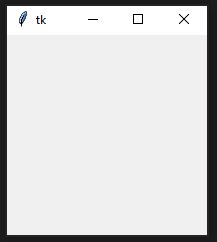

We are creating an instance a GUI application.   More accurately, it's an instance of a main window of a GUI application, complete with its own Tcl interpreter.

    root = Tk()
    
The Application class is basically a clean copy of Tkinter's Frame object.  A Frame is just a container that can hold GUI stuff (known as 'widgets').    

    class Application(Frame):

When we create an instance of the class, we pass along the main window that we just created.

    app = Application(master=root)
    
When we're done, we run it.   The mainloop() method handles polling (it's always asking the widgets whether they've been clicked) and event handling (what to do in response to a mouse click, keystrokes, etc).

    app.mainloop()

When we run the cell with the gui code, a modal interactive window is spawned.  It'll be small and maybe buried under a bunch of other app windows.   You might look at your toolbar and a find an icon that looks like a feather.   It should look like the image above.

Take a moment to appreciate what we just got with the modal window for free.   It's interactive.  We can resize it.  It has a decorative icon on the top left, along with a default name "tk".   And all the buttons work.   Not bad.



## Adding User Control

But there are many things we can do to upgrade. Let’s check some of
these out.  Lets make one of these:

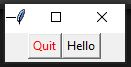

In [ ]:
from tkinter import *
import ipywidgets as widgets

#%gui tkinter

class Application(Frame):
    
    # An action to tie to a widget so it can respond to an event.
    def say_hi(self):
        print("Hi there!")
        #with self.out:
        #    print("Hi there, everyone!")
        
    def createWidgets(self):
        # Create a custom Button object, tied to a tkinter Frame's quit method.
        self.QUIT = Button(self)
        self.QUIT["text"] = "Quit"
        self.QUIT["fg"] = "red"
        self.QUIT["command"] = self.quit
        
        # The pack method calls a geometry manager to decide how/where to render it.
        self.QUIT.pack({"side": "left"})
        
        # Create a custom Button object to invoke our 'say_hi' method when clicked.
        self.hi_there = Button(self)
        self.hi_there["text"] = "Hello",
        self.hi_there["command"] = self.say_hi
        
        # Invoke its pack method
        self.hi_there.pack({"side": "left"})
               
    def __init__(self, master=None):
        # Invoke the parent's __init__ method (usually a good idea)
        Frame.__init__(self, master)
        
        # Allow the geometry manager add the root Frame to the main window
        self.pack()
        
        self.out = widgets.Output(layout={'border': '1px solid black'})
        
        # Populate the main frame with widgets
        self.createWidgets()
        
# Boilerplate - same as before        
root = Tk()
app = Application(master=root)

if demo_mode:
    app.mainloop()



We've just created this GUI.   You can see it has two new buttons.   It's still no great shakes, but it does say "Hi There".   We've proven it's responsive and our event handler works.




## User Choice in Command Branching

Let's upgrade the inputs a bit.  How about an object that allows multiple, discrete choices.

Let's try to make one of these:

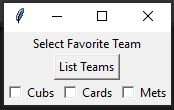

In [ ]:
from tkinter import *


class Application(Frame):
    def report(self):
        status = [self.status1.get(),  # a list of results
                  self.status2.get(),
                  self.status3.get()
                  ]
        
        print(f"Checkbox states: {status} \n")
        
        # Each checkbox has a value of 1 if checked, 0 otherwise
        if not sum(status):
            print("Please select a team.")
            return
        
        # Read the value of ezch textbox, then uncheck it.
        if status[0]:
            print(self.ck1["text"], "GO CUBS!")
            self.ck1.deselect()
        if status[1]:
            print(self.ck2["text"])
            self.ck2.deselect()
        if status[2]:
            print(self.ck3["text"])
            self.ck3.deselect()

    def createWidgets(self):
        "populate master frame"
        
        # Create a Label.  Go ahead and pack it since we won't fool with it again.
        Label(text="Select Favorite Team").pack()  # returns None
        
        # Create a Button to activate our handler.
        self.b1 = Button(text="List Teams", command=self.report)
        self.b1.pack(side=TOP)
        
        
        # IntVar objects are integer-like objects
        
        # This syntax creates a tuple on the right and unpacks it on the left
        self.status1, self.status2, self.status3 =  IntVar(), IntVar(), IntVar()
        
        # Create some checkboxes, assign each its own status object
        self.ck1 = Checkbutton(text="Cubs", variable=self.status1)
        self.ck2 = Checkbutton(text="Cards", variable=self.status2)
        self.ck3 = Checkbutton(text="Mets", variable=self.status3)
        
        # Pack them in side-by-side, against the left wall.
        self.ck1.pack(side=LEFT)
        self.ck2.pack(side=LEFT)
        self.ck3.pack(side=LEFT)

    def __init__(self, master=None):
        Frame.__init__(self, master)
        self.pack()
        self.createWidgets()

root = Tk()
app = Application(master=root)
if demo_mode:
    app.mainloop()

Radio buttons are exclusive – each collection of them\[34\] can only
have one active at a time. Here’s a version of the previous example,
refactored a bit. Here, we’ve “flattened” the app – everything is within
‘master’ (which is an instance of **Tk**). This is not particularly good
practice for real apps – you will typically use **frames** and
frames-within-frames to discretize the widgets.

Here, we take some shortcuts to make a more parsimonious bit of code.   This isn't particularly recommended, but you can do it.  We'll try to make one of these:

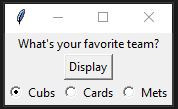

In [ ]:
from tkinter import *

def report():  
    # Grab/report the status of the text box.
    print(txt[status1.get()])
    
# Create an instance of the master frame
master = Tk()

# Provide an integer-like object to represent status.
status1 = IntVar()

# Create and pack a Lable object
Label(master, text="What's your favorite team?").pack()

# Create and pack a Button object to trigger reporting
b1 = Button(master, text="Display", command=report)
b1.pack(side=TOP)

# Make some text to go in the Radiobuttons
txt = ["Cubs", "Cards", "Mets"]

# Create Radiobuttons
radios = [Radiobutton(master, value=0),
          Radiobutton(master, value=1),
          Radiobutton(master, value=2)]

# Use zip to tie together the text and Radiobuttons
for radio, s in zip(radios, txt):
    radio["text"] = s
    radio["variable"] = status1
    radio.pack(side=LEFT)

if demo_mode:
    master.mainloop()

Wrangling Widgets with Frames
-----------------------------

It’s generally desirable to herd related widgets into their own
**frame** containers to separate functionality and to ease maintenance.
Here’s an example of how this might be accomplished; we'll try to make one of these:

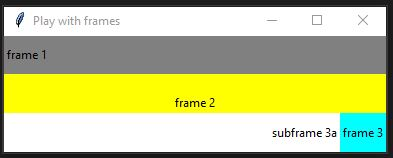

In [ ]:
from tkinter import *

# Make a root container object and wrench some properties.
root = Tk()
root.geometry("400x300")
root.title("Play with frames")

# Create a new Frame as 'child object' to root
f1 = Frame(root, bg="grey")

# Populate the new Frame (f1)
Label(f1, text="frame 1", bg="grey").pack(side=LEFT)
f1.pack(expand = True, fill=BOTH)

# Populate another new Frame (f2)
f2 = Frame(root, bg="yellow")
Label(f2, text="frame 2", bg="yellow").pack(side=BOTTOM)
f2.pack(expand=True, fill=BOTH)

# Populate yet another new Frame (f3)
f3 = Frame(root, bg="#00ffff") #alternative specification
Label(f3, text="frame 3", bg="#00ffff").pack(side=RIGHT)
f3.pack(expand=True, fill=BOTH)

# Populate a sub-Frame (f3a) as a 'chile object' of f3
f3a = Frame(f3, bg="white") #alternative specification
Label(f3a, text="subframe 3a", bg="white").pack(side=RIGHT)
f3a.pack(expand=True, fill=BOTH)

if demo_mode:
    root.mainloop()

Here we explore the notion that Frames can live within other Frames.  Initially, we created a master Frame.  It's just a container and can hold any other widgets.   Into it we installed other frames (f1, f2, and f3) with commands like:

    f1 = Frame(root, bg="grey")
    
The first argument is the parent object ('root' is what we're calling the master Frame instance).

So when we make sub-Frames, we simply use a different Frame as the parent.

    f3a = Frame(f3, bg="white")
    
We introduce one more characteristic for all of these - how the object behaves when the master container is resized.  When we issue a command like:

    f3a.pack(expand=True, fill=BOTH)

... we're asking it to expand to fill the outer container as it shrinks or expands.

Now, let's try to build some menus.   We'll make one of these:

Building Menus
--------------

Did you ever wonder how they make drop down menus used to run GUI apps
like Wing? Wonder no more — in this section we’ll learn how to build a
simple menu from scratch.

The first step is to construct a “root menu” upon which we’ll build
child objects to control the content displayed and actions performed.

We'll build a basic menu next:

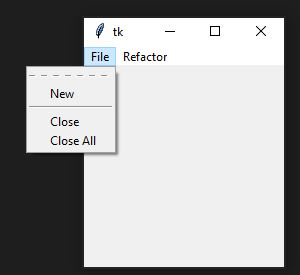

In [ ]:
from tkinter import *


def placeholder():
    print("placeholder event")
    # This idiom rolls the right-most value through a chain of variables
    file_new = file_close = file_close_all = refactor_rename = refactor_move = placeholder

# Per usual, create a master window
root = Tk()

# We need to add a root menu object to the master window
menubar = Menu(root)
root.config(menu=menubar)

# Create another Menu object that we'll add to the root menu
filemenu = Menu(menubar)

# ... but first, we'll treat it as another container and add widgets to it
filemenu.add_command(label="New", command=file_new)
filemenu.add_separator()
filemenu.add_command(label="Close", command=file_close)
filemenu.add_command(label="Close All", command=file_close_all)

# This command actually adds the new sub-menu to the main one
menubar.add_cascade(label="File", menu=filemenu)

# These commands create and populate a second sub-menu
editmenu = Menu(menubar)
editmenu.add_command(label="Rename Symbol", command=refactor_rename)
editmenu.add_command(label="Move Symbol", command=refactor_move)

# Now we'll add it to the root menu
menubar.add_cascade(label="Refactor", menu=editmenu)

# Per usual, we'll set the listener loop
if demo_mode:
    root.mainloop()

To create a menu, we're piling on widgets hierarchically beginning with our master window.  We can nest items to any depth in the same fashion.

        # master window
        root = Tk()   

            # top-level menu
            menubar = Menu(root) 
            root.config(menu=menubar)

                # second-level menu (for File)
                filemenu = Menu(menubar)  # second-level menu
                menubar.add_cascade(label="File", menu=filemenu)
                
                    # individual menu items

                # second-level menu (for Refactor)
                editmenu = Menu(menubar)
                menubar.add_cascade(label="Refactor", menu=editmenu)
                
                    # individual menu items
            
 It's a bit tedious, but getting the job done is straightforward. 

## Text Input

Menus, check boxes, and radio buttons are great as far as they go, but sometimes we'll need open-ended user input.  Here's how we can add dialog that allows direct text input.

We'll go ahead and make one of these:

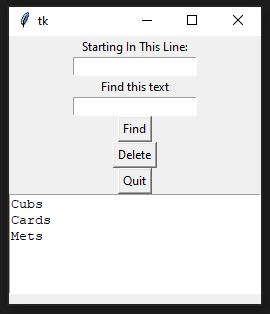

It's not pretty, but has all the essentials of a text search tool.   The bottom block has content to search.   The top block allows input of the first place to search for the text provided in the middle box.    The buttons direct the underlying code to Find and/or Delete any content matching the query.

Let's give it a shot:

In [ ]:
from tkinter import *


def find_text():
    "Search for user-supplied text."

    line = entry_line.get()
    look_for = entry_find.get()
    data = text.get(line + ".0", END)
    if look_for in data:
        print("Yay, we found {}!".format(look_for))
    else:
        print("Sorry, no {} here.".format(look_for))


def delete_text():
    """Delete specific text from a designated line.  This involves 'vaccuming out'
         the contents, editing it with string methods, and replacing it.
    """

    # Capture the provided text using the get() method
    line = entry_line.get()
    all_text = text.get(line + ".0", END)
    look_for = entry_find.get()

    # Do an ordinary str.replace() on the captured text
    all_text = all_text.replace(look_for + '\n', '')
    # Delete the contents of the Text box
    text.delete(line + ".0", 'end')
    # Insert the edited code.
    text.insert("end", all_text)


# Root window
root = Tk()

# Create and pack a Label for the top block
Label(root, text="Starting In This Line:").pack()

# Create an Entry widget to accept Starting Line
entry_line = Entry(root)
entry_line.pack()

# Create and pack a second Entry widget for the Find Text
Label(root, text="Find this text").pack()
entry_find = Entry(root)
entry_find.pack()

# Create the Buttons, each linked to its own action.
b1 = Button(root, text="Find", command=find_text).pack()
b2 = Button(root, text="Delete", command=delete_text).pack()
b3 = Button(root, text="Quit", command=root.destroy).pack()

# Create the bottom Text box and give it some content
text = Text(root, height=6, width=50)
text.insert("end", "Cubs\nCards\nMets")
text.pack()

# Finally, set up the listener loop.
if demo_mode:
    root.mainloop()

Now we can play with it.   For instance, if we asked to start in Line 1 and searched for "Cubs" (or "ubs") the GUI will report success.    If we ask to start in Line 2, it will report failure.

Working with the text within is a bit weird, but OK once you get the
hang of it. To add text, you use the **insert**() command, providing an
insertion point and some text. For instance, to add a few baseball teams
you can go:

    text.insert("end", "Cubs\\nCards\\nMets") 
    
Here, the “end” positional argument is already known to the Text widget,
as is the alias **END**. To get information out, you need to specify
both the beginning point and end point using this syntax:

    line number.position within line

This reads all the contents into the variable ‘data’.

    line = entry_line.get()
    data = text.get(line + ".0", END)

To delete content, you can use the **delete**() method of the **Text**
widget using the same syntax as **get**().    

Now that you've mastered GUIs, the next step will be to create one of these.   Don't worry - it will only take you a couple of weeks:

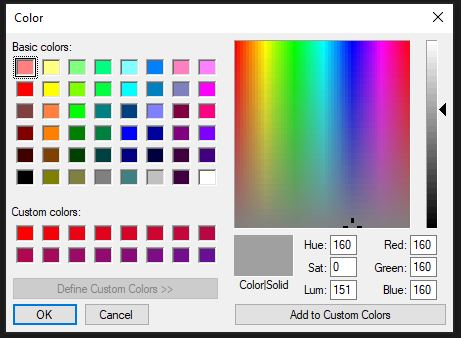

Built-in GUI Magic
-----------------

Happily, **Tkinter** has been around for a long time.   People have figured out some higher-level tools to solve common problems.  **Tkinter** has several compound widgets already built into the system.
I’ll show you a couple here so you know about them and leave further
exploration to you.

There are several really routine interactions your GUI will have with
the user – things like asking Yes or No, displaying a warning that he’s
about to destroy his root directory. Many of these are already baked in.

Here’s an example:


    if askyesno('Check chocolate', 'Sure you want chocolate'):
        print("OK. Chocolate it is.")
    else:
        print("I didn't think so.")

This code grabs the **tkinter**.**messagebox**.**askyesno**() tool. The
two arguments specify the dialogue box’s header and the second poses the
question. The return is **True** (yes) or **False** (no). Right out of
the box, it gives you a professional-looking dialogue box.

Here's the code to make it work:

In [ ]:
from tkinter import *
from tkinter.messagebox import *

   
def double_check_chocloate():
    if askyesno('Check chocolate', 'Sure you want chocolate'):
        print("OK. Chocolate it is.")
    else:
        print("I didn't think so.")
        
def double_check_vanilla():
    print("You want vanilla and I trust you.")        
        
root = Tk()
root.geometry("200x50")

b1 = Button(root, text="Chocloate", command=double_check_chocloate)
b1.pack(side=TOP)

b2 = Button(root, text="Vanilla", command=double_check_vanilla)
b2.pack(side=TOP)

if demo_mode:
    root.mainloop()

In [ ]:
You can explore these other **tkinter**.**messagebox** options at your
leisure:

| askokcancel    | showerror   |
|----------------|-------------|
| askquestion    | showinfo    |
| askretrycancel | showwarning |
| askyesnocancel |             |

Here are couple more libraries of interest:

    **tkinter**.**colorchooser** – great color selection dialogs
    
        (rgb_color,hex_color) = askcolor()

    **tkinter**.**filedialog** – file system exploration
    
        file_to_open = askopenfilename()

In [ ]:
from tkinter import *
from tkinter.colorchooser import askcolor
from tkinter.filedialog import askopenfilename

def set_color():
    "Apply the askcolor module."
    (rgb_color,hex_color) = askcolor()
    if ( hex_color ):
        print(hex_color, rgb_color)
        btn_color.config(background=hex_color)
        
def read_file():
    "Apply the askopenfilename() method. Report contents to a Text box"
    file_to_open = askopenfilename()   
    with open(file_to_open, "r") as f:
        lines = f.readlines()    
    for line in lines: 
        text.insert(END, line)
        
def delete_text(): 
    "Delete the contents of a Text box"
    text.delete(1.0,END)

#Main window
root = Tk()

#Configure a button to set its color with askcolor()
btn_color = Button(root, text="Choose a Color", command = set_color)
btn_color.config(height=1, font=("Cambria", 10, 'italic'))
btn_color.pack(expand=YES, fill=BOTH)

#Create buttons to read files and delete text
Button(text="Open File", command=read_file).pack()
Button(text="Clear", command=delete_text).pack()

#Add a text button to hold file contents
text = Text(height=10, width=70)
text.pack()

#Fire off the main listener loop.
if demo_mode:
    root.mainloop()

In [ ]:
Parting Thoughts
----------------

We’ve only covered the **pack**() geometry manager here – mostly because
it’s the easiest to use. If you really want granular control over the
layout, you’ll want to consider using the **grid**() instead. This gives
you control over what row and column of an imaginary grid that your
objects should live in. You can read all about it when you get
time\[35\].

You may be tempted to combine the ease of use of **pack**() and the
accuracy of **grid**(). You can do that, but don’t create a situation
where you’ve got two different geometry managers controlling objects in
the same container. This will produce highly unpredictable results which
are nigh-near impossible to debug.

Finally, **tkinter** is not your only choice when selecting a GUI tool,
it’s just Python’s official set of bindings to **Tcl** (pronounced
“tickle”, believe it or not). Others include **PyQt**, **wxPython**, and
**PyGTK**. Wikipedia has great article that summarizes your
choices\[36\].

OK. Now you’re ready to get some GUI dirt under your fingernails! You’ve
seen how to use the required widgets, so let’s put them in harness

## Exercise

Please create a GUI that produces this interface:

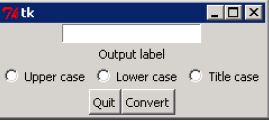

… and the promised functionality.
 
Hint: you’ll probably find it useful to use internal Frame objects to organize your widgets.
    
Extra credit: Add info dialogs to warn the user of the dire consequences of changing the case on their choices.